# **Codveda Technologies Internship For ML**

# Task 3: Neural Networks with TensorFlow/Keras

**Intern**-Muhammad Sakibur Rahaman

**Dataset**-*MNISTdigit*

**Objectives**:

* Load and preprocess the dataset.
* Design a neural network architecture (input layer,
hidden layers, and output layer).
* Train the model using backpropagation.
* Evaluate the model using accuracy and visualize the
training/validation loss.
* Tools: Python, TensorFlow/Keras, pandas, matplotlib

**Description**: Build a simple feed-forward neural
network using TensorFlow/Keras for classification
tasks (e.g., MNIST digit classification).



---



# 1.Import the relevant libraries

In [40]:
!pip install tensorflow matplotlib numpy


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2.Dataset Loading

* The task in MNIST digit classification is to correctly classify handwritten digits into one of these 10 categories.

* Each sample in the dataset is a grayscale image of size 28×28 pixels.
* Classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

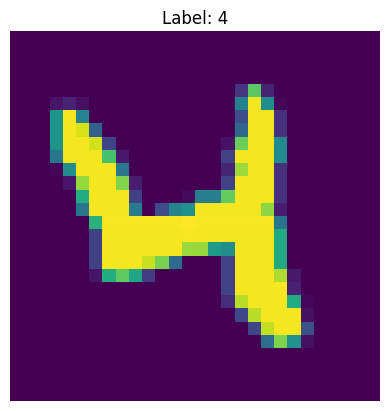

In [4]:
plt.imshow(x_train[20])
plt.title(f"Label: {y_train[20]}")
plt.axis('off')
plt.show()

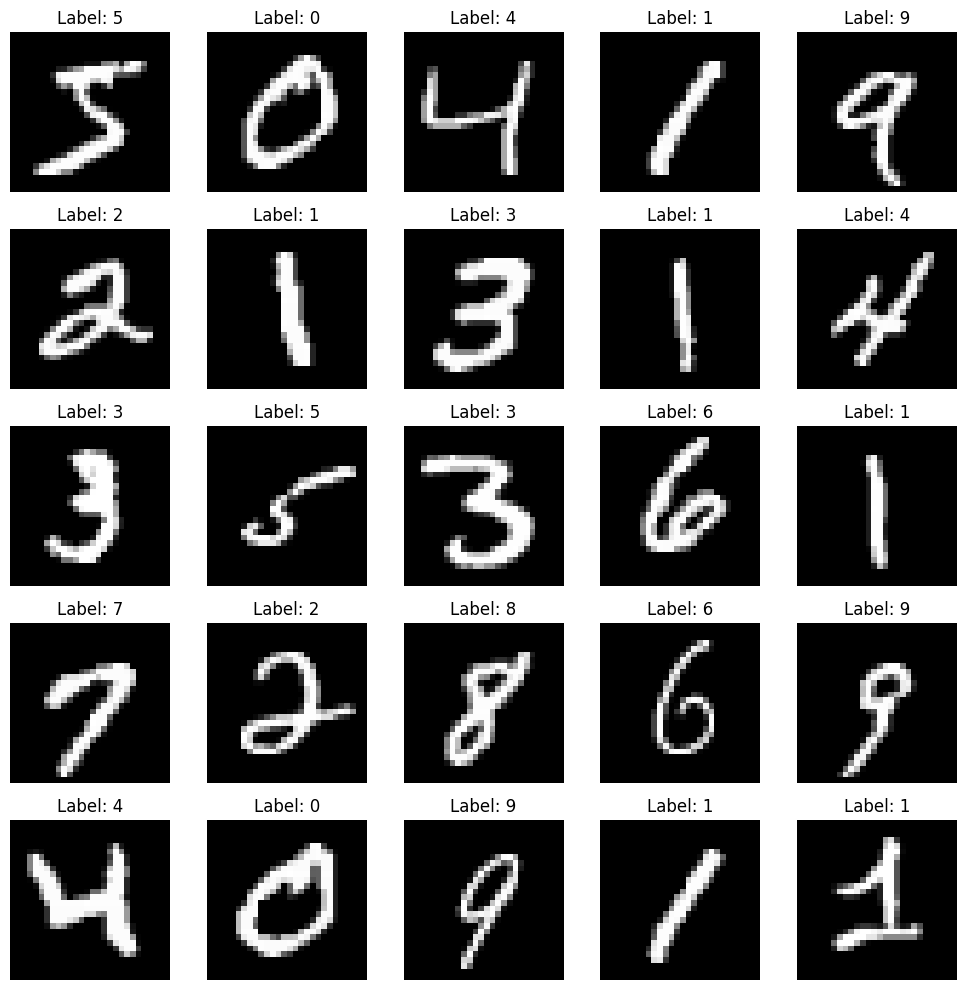

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 3.Normalization

* Reshaping prepares the data for fully connected layers in a neural network.
* Normalization ensures faster and more stable training by scaling input values.

In [6]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

In [34]:
# Convert labels to one-hot encoded
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# 4.Define the Neural Network Architecture

In [21]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer
    Dense(64, activation='relu'),                         # Hidden layer
    Dense(10, activation='softmax')                       # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5.Compile the Model

In [27]:
history = model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6.Train the Model

* Batch Size:A batch size of 32 means that 32 samples are used to compute the gradient and update the model weights before the next batch of 32 samples is processed.
* Number of Epochs: The number of times the entire training dataset is passed through the model.

In [28]:
history = model.fit(x_train,
          y_train,
          epochs=10,                   # Train the model and store the training history
          batch_size=32,
          validation_split=0.25)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8561 - loss: 0.4972 - val_accuracy: 0.9542 - val_loss: 0.1513
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9644 - loss: 0.1170 - val_accuracy: 0.9637 - val_loss: 0.1175
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9754 - loss: 0.0763 - val_accuracy: 0.9719 - val_loss: 0.0962
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9826 - loss: 0.0538 - val_accuracy: 0.9707 - val_loss: 0.1030
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9699 - val_loss: 0.1093
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9741 - val_loss: 0.0958
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9906 - loss: 0.0262 - val_accuracy: 0.9749 - val_loss: 0.1046
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9950 - loss: 0.0176 

# 7.Evaluate the model's performance on test data

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy}")
print(f"\n Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1551

 Test Accuracy: 0.9704999923706055

 Test Loss: 0.12515971064567566


# 8.Visualize Training & Validation Accuracy and Loss

In [29]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

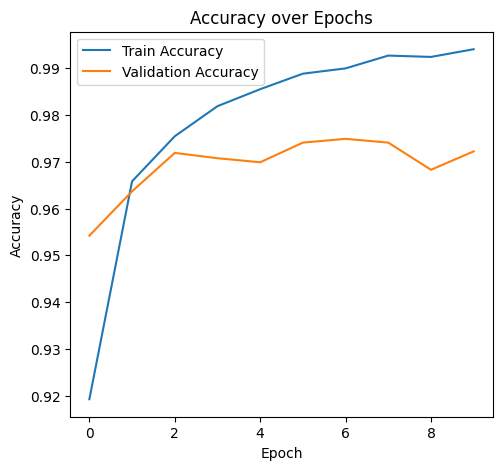

In [30]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

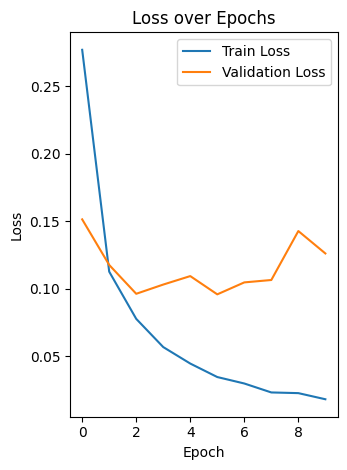

In [31]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 9.Predict on the test set

In [11]:
y_pred = model.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.14813070e-09, 7.17812387e-09, 1.11510280e-06, ...,
        9.99816895e-01, 5.98909082e-08, 7.15447095e-05],
       [2.23799562e-13, 5.06908862e-07, 9.99999464e-01, ...,
        7.67511190e-14, 3.67584192e-11, 2.27701255e-22],
       [1.57326010e-08, 9.99983132e-01, 1.31821579e-07, ...,
        1.57621180e-05, 2.74053860e-07, 3.26925531e-09],
       ...,
       [3.63668275e-16, 2.10082941e-11, 2.81561206e-13, ...,
        2.91998443e-08, 7.12174297e-13, 4.23068195e-06],
       [1.08571274e-16, 1.78311955e-13, 4.47809749e-16, ...,
        1.05252670e-14, 6.34482911e-09, 2.54326492e-15],
       [5.36926596e-14, 3.08796490e-18, 9.01485646e-14, ...,
        1.42401662e-22, 4.94935751e-16, 6.05450747e-17]], dtype=float32)

In [12]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6])

# 10.Compute the confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 970    0    3    1    0    0    3    1    1    1]
 [   0 1124    5    1    0    1    2    0    2    0]
 [   2    0 1018    2    1    0    1    3    5    0]
 [   0    0    8  991    0    2    0    3    3    3]
 [   0    1    7    1  921    1    7    1    0   43]
 [   3    0    0   15    1  858    7    1    4    3]
 [   3    3    2    2    1    3  944    0    0    0]
 [   1    2   14   10    1    0    0  992    0    8]
 [   4    0   23   23    0    3    2    7  909    3]
 [   2    3    2   14    2    3    1    3    1  978]]


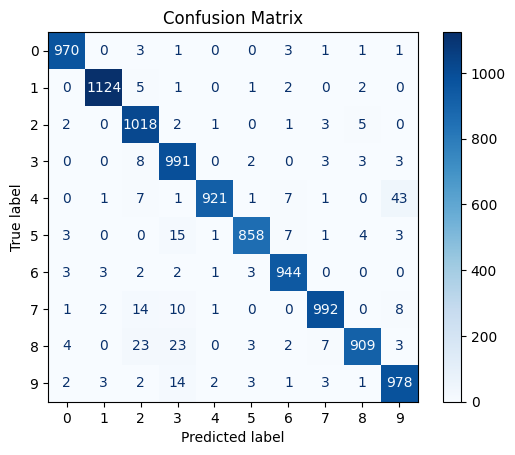

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 11.Save the model

In [15]:
model.save('nn_model.h5')

# 12.Load model

In [16]:
loaded_model = tf.keras.models.load_model('nn_model.h5')
loaded_model

<Sequential name=sequential, built=True>

# 13.Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
True Label: 7
Predicted Label: 7


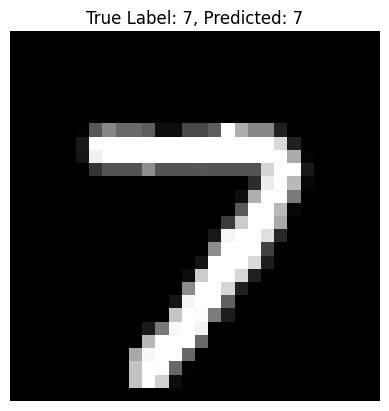

In [18]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

random_image_reshaped = random_image.reshape(1, 28 * 28)
predictions = loaded_model.predict(random_image_reshaped)
predicted_label = np.argmax(predictions)

print(f"True Label: {random_label}")
print(f"Predicted Label: {predicted_label}")

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

**Conclusion**:

In this project, we successfully built a simple feed-forward neural network using TensorFlow/Keras to classify handwritten digits from the MNIST dataset. We followed a structured pipeline:

**Data** **Preprocessing**: Normalized the input data and one-hot encoded the labels.

**Model** **Design**: Created a neural network with two hidden layers using ReLU activation and a softmax output layer.

**Training**: Trained the model using backpropagation with the Adam optimizer and monitored performance on validation data.

**Evaluation**: Achieved high accuracy on the test set, demonstrating the model's ability to generalize.

**Visualization**: Plotted training/validation loss and accuracy to analyze learning behavior & confusion matrix.